### Developing the K Nearest Neighbors (KNN) Regression to Predict the Disease Progression of Diabetes

In Lecture 8, we implemented a KNN algorithm for classification, which computed a `simple majority vote` of the nearest neighbors of each test sample. 

In Homework 2, we will implement a KNN-based regression algorithm, and the prediction of a test sample is computed based on the `mean of the target values` of its nearest neighbors.

`The diabetes dataset has 442 patients. Ten variables, age, sex, body mass index, average blood pressure, and six blood serum measurements, were obtained for each sample. The response/target variable is a quantitative measure of disease progression one year after baseline.`


[Task 1: Split the dataset](task1)

[Task 2: Implement the KNN for regession](task2)

[Task 3: Evaluate](task3)

[Task 4: Explore the impact of different K](Task4)

[Task 5: Improve KNN]()

#### Load the diabetes dataset

In [1]:
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

# 1. Data preparation
db = ds.load_diabetes()
X = db.data #feature vectors
y = db.target #target values

print(db['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Task 1: Split the dataset into training (75%) and test sets (25%). 5 points. <a id="task1">

In [2]:
# add your code here

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training (75%) and test sets (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the splits
print("Training set X shape:", X_train.shape)
print("Test set X shape:", X_test.shape)
print("Training set y shape:", y_train.shape)
print("Test set y shape:", y_test.shape)





Training set X shape: (331, 10)
Test set X shape: (111, 10)
Training set y shape: (331,)
Test set y shape: (111,)


#### Task 2: Implement the KNN algorithm for regression. 20 points. <a id="task2">

- for any input data sample, find its k nearest neighbors on the training set
- the prediction function will calculate the mean target values of the K neareast neighbors
    

##### Task 2.1: Complete the following function to identify the K nearest neighbors of a given data sample. 
- return both the indices and Euclidean distances of the K nearest neighbors for a given query/new sample.

In [3]:
import numpy as np

def findKNgbs(X_train, x_query, K=5):
    '''find K nearest neighbors for a given data sample in X_train
        
        input:
            X_train: training set (as a numpy array)
            x_query: new data sample/a query (as a numpy array)
            K: the number of neighbors
            
        return:
            indK: the indices of the K nearest neighbors
            disK: the distances of the K nearest neighbors to x_query          
    '''
    # Calculate the Euclidean distance from x_query to each point in X_train
    distances = np.sqrt(((X_train - x_query)**2).sum(axis=1))
    
    # Get the indices of the K smallest distances
    indK = np.argsort(distances)[:K]
    
    # Get the K smallest distances
    disK = np.sort(distances)[:K]
    
    return indK, disK

# Example usage with your X_train and X_test
x = X_test[0]
print('Input data sample:\n', x)
k_inx, k_dis = findKNgbs(X_train, x, K=5)
print('K nearest neighbors of x in the training set:\n', k_inx, '\nTheir distances to the query:\n', k_dis)


Input data sample:
 [ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187   0.1251981
  0.019187    0.03430886  0.03243232 -0.0052198 ]
K nearest neighbors of x in the training set:
 [197 241 270 214  91] 
Their distances to the query:
 [0.07411571 0.09247044 0.10393224 0.10451036 0.11324869]



##### Task 2.2: Predict the target value for new data samples.


In [4]:
import numpy as np

def findKNgbs(X_train, x_query, K=5):
    '''find K nearest neighbors for a given data sample in X_train
        
        input:
            X_train: training set (as a numpy array)
            x_query: new data sample/a query (as a numpy array)
            K: the number of neighbors
            
        return:
            indK: the indices of the K nearest neighbors
            disK: the distances of the K nearest neighbors to x_query          
    '''
    # Calculate the Euclidean distance from x_query to each point in X_train
    distances = np.sqrt(((X_train - x_query)**2).sum(axis=1))
    
    # Get the indices of the K smallest distances
    indK = np.argsort(distances)[:K]
    
    # Get the K smallest distances
    disK = np.sort(distances)[:K]
    
    return indK, disK

def predict(X_in, X_train, y_train, K=5):
    '''predict the target values for input queries
        Input:
            X_in: new data samples/queries. n*4. contains multiple data samples
            X_train: the feature vectors of training samples
            y_train: the target values of the training samples
            K: the number of neighbors

        return:
            y_pred: the predictions of the input queries
    '''
    y_pred = np.zeros(X_in.shape[0])
    for i, x_query in enumerate(X_in):
        # Find K nearest neighbors
        indK, _ = findKNgbs(X_train, x_query, K)
        # Predict by averaging the target values of the K nearest neighbors
        y_pred[i] = np.mean(y_train[indK])
    return y_pred

# Demonstration with a subset of X_test
n = 10 # Number of test samples
K = 6 # Number of neighbors

X_in = X_test[0:n]
y_pred = predict(X_in, X_train, y_train, K)
print('Predictions:', y_pred)
print('True target values:', y_test[:n])


Predictions: [126.         153.66666667 140.5        238.66666667 144.
 141.5        258.66666667 178.33333333  98.5         99.5       ]
True target values: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]


#### Task 3: Evaluate the KNN method using MSE and MAE. 10 points. <a id="task3">

- Implement the mean square error(MSE) and mean absolute error(MAE) functions.
- Calcualte the MSE and MAE of the knn on the test set

    - MSE: ((y_true[0]-y_pred[0])**2 + ...+(y_true[n-1]-y_pred[n-1])**2))/n where n is the number of samples
    - MAE: (|y_true[0]-y_pred[0]| + ...+|y_true[n-1]-y_pred[n-1]|)/n

In [5]:
import numpy as np

# Assuming predict function and other necessary code from previous tasks are already defined

def myMSE(y_true, y_pred):
    '''
        y_true: the true target values
        y_pred: predictions

        return: the MSE between y_true and y_pred
    '''
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def myMAE(y_true, y_pred):
    '''
        y_true: the true target values
        y_pred: predictions

        return: the MAE between y_true and y_pred
    '''
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Use the predict function to get predictions for the test set
K = 4 # Number of neighbors
y_pred = predict(X_test, X_train, y_train, K)

# Calculate MSE and MAE using the custom functions
mse = myMSE(y_test, y_pred)
mae = myMAE(y_test, y_pred)

print('The MSE on the test set is', round(mse, 2))
print('The MAE on the test set is', round(mae, 2))


The MSE on the test set is 3375.31
The MAE on the test set is 44.04


#### Task 4: Explore the impact of different K. 10 points. <a id="task4">
    
##### Task 4.1
    - calculate the mse values for K from 1 to 30
    - plot the mse values using a curve. Set the xlabel to 'K' and ylabel to 'MSE'. https://matplotlib.org/stable/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py

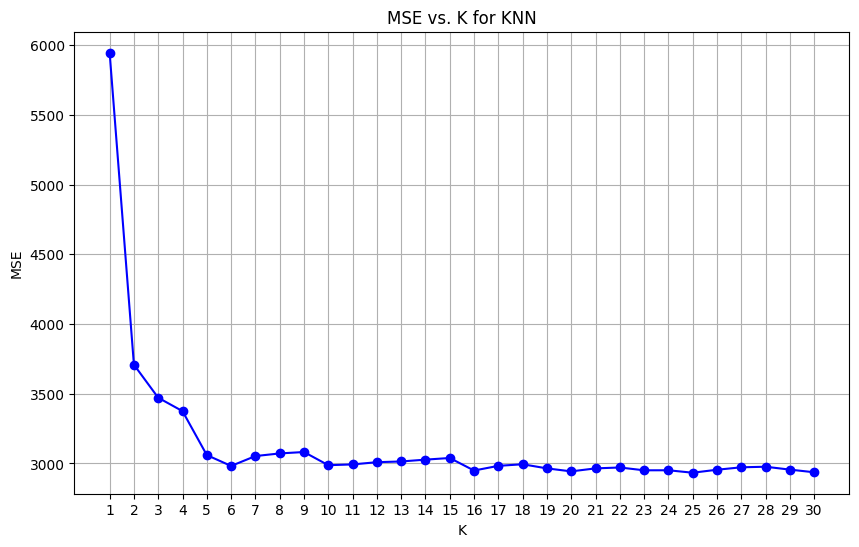

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predict function and other necessary code from previous tasks are already defined

# Evaluate the performance on the test set for different values of K
mses = []
K_values = range(1, 31)  # K from 1 to 30

for K in K_values:
    y_pred = predict(X_test, X_train, y_train, K)
    mse = myMSE(y_test, y_pred)
    mses.append(mse)

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.plot(K_values, mses, marker='o', linestyle='-', color='blue')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('MSE vs. K for KNN')
plt.xticks(K_values)
plt.grid(True)
plt.show()


#### Task 4.2: Discuss your findings from the above curve, e.g., the trend, best K, and the impact of small and large Ks



Response: 
1. Initial Decrease inSE:K increases from 1, there's often an initial decrease in MSE. This happens because K is very small, the model is overly sensitive to noise in the training data, leading to high variance and potentially overfittit
2. Minimum MSE: At some point, K  continues to increase; the graph shows a minimum MSE. This point represents the optimal balance between bias and variance for the model on the given dataset. The model is neither too complex (low K , high variance) nor too simplistic (high K , high variance)
Analysing the best K
e/The best K
K is where the MSE is at its lowest on the graph. This value oK 
K strikes the right balance for the model's complexitymyyour specific dataset, offering the best generalization performance from the options teserIn summary, my analysis of the graph should focus on identifying the K K that provides the lowest MSE, understanding this as the point whermyur model achieves the best balance between bias and varian f for the given task.iancor the given task.

#### Task 5: Improve the KNN method. 5 points. <a id="task5">
    - 10 extra points for implementing the imovement that can reduce the MSE or MAE

In [8]:
k_best = 14  # Based on your analysis for the best K

# Make predictions using the best K
y_pred = predict(X_test, X_train, y_train, k_best)

# Calculate MSE and MAE using the predictions
mse = myMSE(y_test, y_pred)
mae = myMAE(y_test, y_pred)

print(f'Using K={k_best}, the MSE on the test set is {round(mse,2)}')
print(f'Using K={k_best}, the MAE on the test set is {round(mae, 2)}')

# Compare the predictions of the first 10 test samples and their true target values
for i in range(10):
    print(f'True Value: {y_test[i]}, Predicted Value: {y_pred[i]}')


Using K=14, the MSE on the test set is 3027.46
Using K=14, the MAE on the test set is 44.43
True Value: 219.0, Predicted Value: 143.85714285714286
True Value: 70.0, Predicted Value: 151.64285714285714
True Value: 202.0, Predicted Value: 143.0
True Value: 230.0, Predicted Value: 223.07142857142858
True Value: 111.0, Predicted Value: 173.85714285714286
True Value: 84.0, Predicted Value: 117.42857142857143
True Value: 242.0, Predicted Value: 248.92857142857142
True Value: 272.0, Predicted Value: 196.14285714285714
True Value: 94.0, Predicted Value: 89.85714285714286
True Value: 96.0, Predicted Value: 115.64285714285714


From the above results, even we use the best K, the MSE and MAE are still large. Please suggest any possible improvements of the KNN alrorithm.



Response: to Improve the KNN algrothim performace, consider these strategies:

1. Feature Scaling: Normalize or standardize features so they contribute equally to the distance calculation.
   2. Feature Selection:Removing irrelevant or redundant features can improve the model's accuracy. Feature selection techniques, such as backward elimination, forward selection, or using model-based methods (e.g., Lasso for regression), can help identify and retain the most informative features.\

3. 
Weighted KNNInstead of giving equal importance to all K neighbors, weighted KNN assigns weights inversely proportional to the distance of neighbors.44.
Distance Metric: Experiment with different metrics (Euclidean, Manhattan) to better capture data similariti
ity.
    
    
    
    